In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
retrain_sizes = '''academic 181
activity_1 88
aircraft 46
allergy_1 98
apartment_rentals 80
architecture 17
assets_maintenance 31
baseball_1 82
battle_death 16
behavior_monitoring 40
bike_1 104
body_builder 24
book_2 21
browser_web 18
candidate_poll 40
car_1 92
chinook_1 84
cinema 30
city_record 40
climbing 40
club_1 70
coffee_shop 18
college_1 164
college_2 169
college_3 74
company_1 7
company_employee 16
company_office 40
concert_singer 45
county_public_safety 40
course_teach 30
cre_Doc_Control_Systems 33
cre_Doc_Template_Mgt 84
cre_Doc_Tracking_DB 90
cre_Docs_and_Epenses 84
cre_Drama_Workshop_Groups 82
cre_Theme_park 84
csu_1 69
culture_company 38
customer_complaints 46
customer_deliveries 16
customers_and_addresses 88
customers_and_invoices 82
customers_and_products_contacts 15
customers_campaigns_ecommerce 15
customers_card_transactions 80
debate 15
decoration_competition 15
department_management 16
department_store 88
device 40
document_management 44
dog_kennels 82
dorm_1 100
driving_school 93
e_government 40
e_learning 82
election 68
election_representative 20
employee_hire_evaluation 38
entertainment_awards 22
entrepreneur 40
epinions_1 29
farm 40
film_rank 48
flight_1 96
flight_2 80
flight_4 82
flight_company 19
formula_1 79
game_1 86
game_injury 19
gas_company 46
geo 564
gymnast 40
hospital_1 100
hr_1 122
icfp_1 66
imdb 109
inn_1 74
insurance_and_eClaims 40
insurance_fnol 42
insurance_policies 48
journal_committee 18
loan_1 80
local_govt_and_lot 17
local_govt_in_alabama 15
local_govt_mdm 14
machine_repair 30
manufactory_1 80
manufacturer 16
match_season 58
medicine_enzyme_interaction 44
mountain_photos 17
movie_1 97
museum_visit 18
music_1 100
music_2 100
music_4 60
musical 40
network_1 56
network_2 85
news_report 18
orchestra 40
party_host 30
party_people 44
performance_attendance 15
perpetrator 21
pets_1 42
phone_1 29
phone_market 15
pilot_record 15
poker_player 40
product_catalog 42
products_for_hire 18
products_gen_characteristics 86
program_share 40
protein_institute 20
race_track 42
railway 21
real_estate_properties 4
restaurant_1 22
restaurants 125
riding_club 17
roller_coaster 17
sakila_1 82
scholar 569
school_bus 18
school_finance 26
school_player 40
scientist_1 48
ship_1 48
ship_mission 30
shop_membership 44
singer 30
small_bank_1 50
soccer_1 14
soccer_2 106
solvency_ii 15
sports_competition 52
station_weather 16
store_1 112
store_product 44
storm_record 44
student_1 68
student_assessment 53
student_transcripts_tracking 78
swimming 30
theme_gallery 40
tracking_grants_for_research 78
tracking_orders 60
tracking_share_transactions 41
tracking_software_problems 48
train_station 23
tvshow 62
twitter_1 27
university_basketball 46
voter_1 15
voter_2 72
wedding 20
wine_1 82
workshop_paper 30
world_1 120
wrestler 40
wta_1 62
yelp 111'''

retrain_sizes = {i:int(np.ceil(float(p.split()[1])*0.3)) for i, p in enumerate(retrain_sizes.splitlines())}
for key in retrain_sizes.keys():
    print(type(key))
    break

<class 'int'>


In [6]:
def get_textfiles():
    textfiles = []
    for i in range(1, 101):
        with open(f'Logs/output_new_{i}.txt') as f:
            textfiles.append(f.read().split('\n'))
    print(len(textfiles))
    return textfiles

def breakdown_to_dict(s):
    s = s.replace(',','').replace(':','').split(' ')
    keys = [s[i*2] for i in range(len(s) // 2)]
    vals = [float(s[(i*2) + 1]) for i in range(len(s) // 2)]
    return dict(zip(keys, vals))

def parse_part_of_run(train):
    breakdown = [breakdown_to_dict(x[20:]) for x in train if x.startswith(' Breakdown results:')]
    breakdown = [breakdown[(2*i)+1] for i in range(100)]
    breakdown = {
        'sel': np.array([b['sel'] for b in breakdown]),
        'cond': np.array([b['cond'] for b in breakdown]),
        'group': np.array([b['group'] for b in breakdown]),
        'order': np.array([b['order'] for b in breakdown])
    }
    accs = [float(x[13:]) for x in train if x.startswith(' Dev acc_qm:')]
    print('acc', len(accs))
    print(breakdown['sel'])
    return {'test_acc': np.array(accs), 'breakdown': breakdown}

def parse_run(txt):
    print(len(txt))
    split = next(i for i in range(len(txt)) if 'retrain' in txt[i])
    print('split', split)
    
    train, retrain = txt[:split], txt[split:]
    print(len(train), len(retrain))
    #print('train', train[4])
    #dataset_name = train[4][11:].partition(' |')[0]
    
    dataset_name = retrain[0].split("/")[0]
    print('here...', dataset_name)
    num = dataset_name.split("_")[-1]
    print('m',retrain_sizes.get(int(num)-1))
    return {
        'dataset_name': dataset_name,
        'retrain_size': retrain_sizes.get(int(num)-1),
        #'train': parse_part_of_run(train),
        'retrain': parse_part_of_run(retrain),
    }

def parse():
    textfiles = get_textfiles()
    results = {}
    for i,txt in enumerate(textfiles):
        print('i',i)
        try:
            results[i] = parse_run(txt)
            print(results[i])
        except: pass
    
    # sort by validation accuracy
    results = list(results.values()) # throw away filenames
    results.sort(key=lambda r: r['retrain']['test_acc'][-10:].mean(), reverse=True)
    return results

In [7]:
os.getcwd()

'/Users/pavitradangati/Downloads/text2sql_transfer_learning/etc/results'

In [8]:
results = parse()
print(results)
results = [r for r in results if r['retrain_size'] is not None] # TODO figure out why 3 parsed values have incorrect names

100
i 0
821
split 2
2 819
here... new_db_split_1
m 55
acc 100
[0.27777778 0.27777778 0.27777778 0.27777778 0.27777778 0.27777778
 0.27777778 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.38888889 0.38888889 0.38888889 0.38888889 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.38888889
 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889
 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889
 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.44444444 0.44444444 0.44444444 0.44444444
 0.44444444 0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5  

split 2
2 703
here... new_db_split_46
m 24
acc 100
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667

 0.33333333 0.41666667 0.41666667 0.41666667]
{'dataset_name': 'new_db_split_89', 'retrain_size': 9, 'retrain': {'test_acc': array([0.        , 0.        , 0.08333333, 0.08333333, 0.16666667,
       0.16666667, 0.16666667, 0.25      , 0.16666667, 0.16666667,
       0.08333333, 0.08333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
    

81


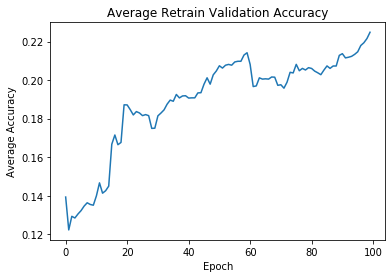

In [9]:
avg = np.zeros(100)
print(len(results))
for res in results:
    avg += res['retrain']['test_acc'] * res['retrain_size']

avg /= sum(r['retrain_size'] for r in results)
plt.plot(avg)
plt.title('Average Retrain Validation Accuracy')
plt.ylabel('Average Accuracy')
plt.xlabel('Epoch')
plt.show()

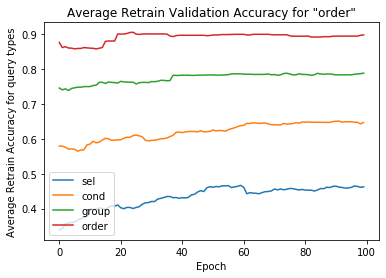

In [17]:
for breakdown_type in ['sel', 'cond', 'group', 'order']:
    avg = np.zeros(100)
    for res in results:
        avg += res['retrain']['breakdown'][breakdown_type] * res['retrain_size']

    avg /= sum(r['retrain_size'] for r in results)
    plt.plot(avg, label=breakdown_type)
    plt.title(f'Average Retrain Validation Accuracy for "{breakdown_type}"')
plt.ylabel(f'Average Retrain Accuracy for query types')
plt.xlabel('Epoch')
plt.legend()
plt.show()